# Evaluation and Interpretation (contd.)

The best model for ANN is loaded for evaluation. After evaluation it was realized that inclusion of other road characteristics data such as shoulder width, injury severity, different road characteristics would have enhanced the quality of this study. Additionally, a computer with better computational resources would also have helped in the study to delve deeper through tuning. Since ANN is a "black-box" model, it was incorporated with Shapley Additive exPlanations (SHAP) to explain the feature important for prediction of severity.


**Limitation in this project**: Due to lack of computational resources, background sample was reduced to 100 for shap explanation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Crash severity

/content/drive/.shortcut-targets-by-id/1PPTdMShCmN_ebwQDrXakKkI4ggw-4Ayf/Crash severity


In [ ]:
import tensorflow as tf
import shap
import pandas as pd
import numpy as np

In [ ]:
nrows_train = 250
nrows_test = 50
X_train = pd.read_csv("X_train.csv", dtype=np.float16, nrows=nrows_train)
X_test = pd.read_csv("X_test.csv", dtype=np.float16, nrows=nrows_test)

In [ ]:
model = tf.keras.models.load_model('best_model.keras')

In [ ]:
explainer = shap.KernelExplainer(model.predict, X_train) #Using subset of train dataset
shap_values = explainer.shap_values(X_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


  0%|          | 0/50 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
17188/17188 ━━━━━━━━━━━━━━━━━━━━ 23s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
17188/17188 ━━━━━━━━━━━━━━━━━━━━ 23s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
17188/17188 ━━━━━━━━━━━━━━━━━━━━ 22s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
17188/17188 ━━━━━━━━━━━━━━━━━━━━ 23s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
17188/17188 ━━━━━━━━━━━━━━━━━━━━ 25s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
17188/17188 ━━━━━━━━━━━━━━━━━━━━ 22s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
17188/17188 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
17188/17188 ━━━━━━━━━━━━━━━━━━━━ 22s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
17188/17188 ━━━━━━━━━━━━━━━━━━━━ 23s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
17188/17188 ━━━━━━━━━━━━━━━━━━━━ 23s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
17188/17188 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
17188/17188 ━━━━━━━━━━━━━━━━━━━━ 23s 

In [ ]:
import pickle
with open('shap_values.pkl', 'wb') as f:
    pickle.dump(shap_values, f)

In [ ]:
import matplotlib.pyplot as plt
class_names = ['minor', 'moderate', 'severe', 'critical']

Top 5 features for minor prediction: ['Distance(mi)', 'Wind_Chill(F)', 'S_Winter', 'S_Fall', 'WC_Fair']


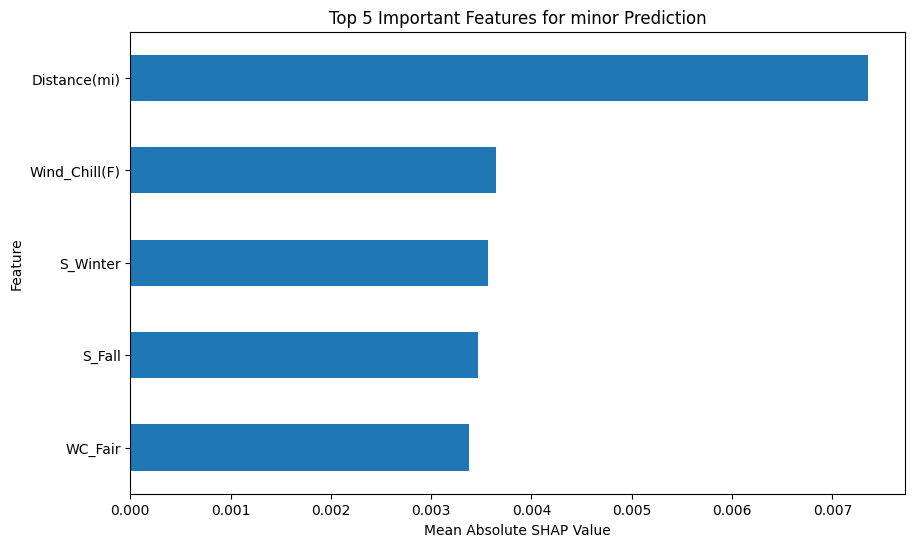

Top 5 features for moderate prediction: ['WC_Fair', 'Distance(mi)', 'S_Winter', 'WC_Cloudy', 'WC_Mostly Cloudy']


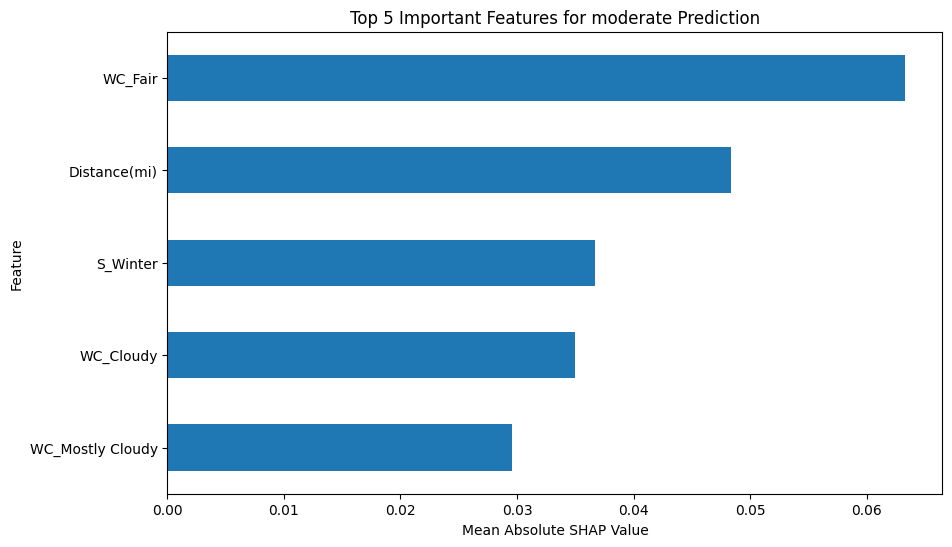

Top 5 features for severe prediction: ['Distance(mi)', 'WC_Fair', 'S_Winter', 'S_Fall', 'WC_Cloudy']


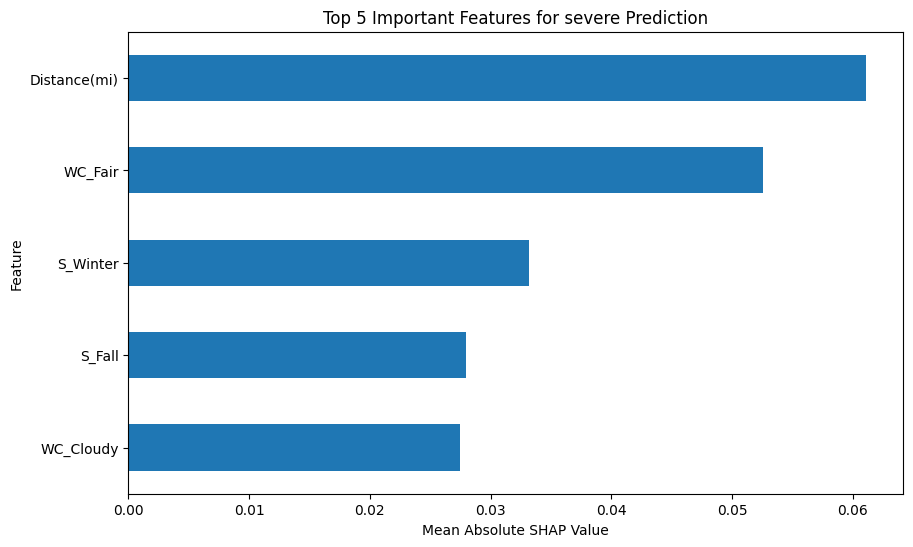

Top 5 features for critical prediction: ['Distance(mi)', 'Wind_Chill(F)', 'WC_Fair', 'WC_Cloudy', 'S_Summer']


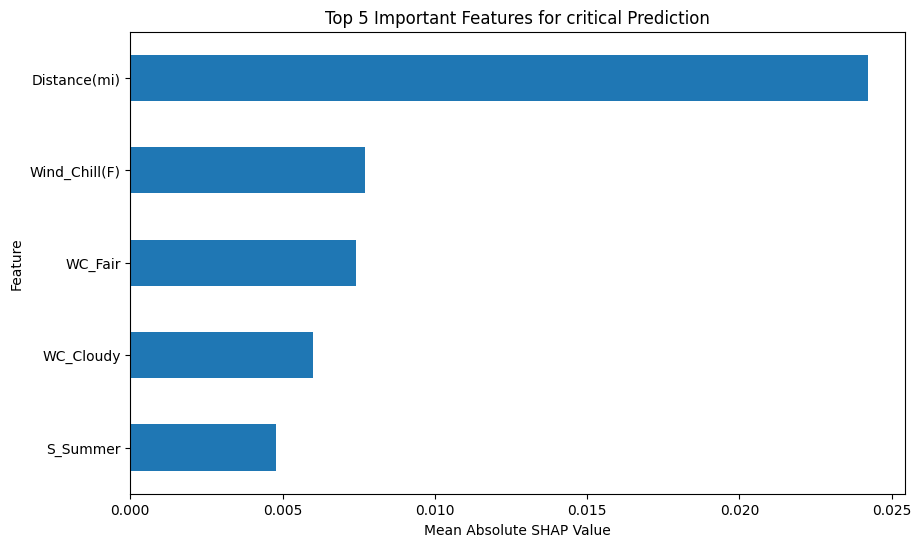

In [ ]:
for class_index in range(len(class_names)):
  shap_class_values = shap_values[:, :, class_index]
  shap_values_mean = np.abs(shap_class_values).mean(axis=0)
  shap_values_df = pd.DataFrame([shap_values_mean], columns=X_test.columns)
  top_features = shap_values_mean.argsort()[-5:][::-1]
  top_features_names = [X_test.columns[i] for i in top_features]
  print(f"Top 5 features for {class_names[class_index]} prediction:", top_features_names)
  plt.figure(figsize=(10, 6))
  shap_values_df.iloc[0, top_features].sort_values(ascending=True).plot(kind='barh')
  plt.xlabel('Mean Absolute SHAP Value')
  plt.ylabel('Feature')
  plt.title(f'Top 5 Important Features for {class_names[class_index]} Prediction')
  plt.savefig(f'shap_values_{class_names[class_index]}.png')
  plt.show()